In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 5))

dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')
bairros = dados.groupby('Bairro')

df_sem_otl = pd.read_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';')
bairros_sem_otl = df_sem_otl.groupby('Bairro')

Text(0, 0.5, 'Valor do Aluguel')

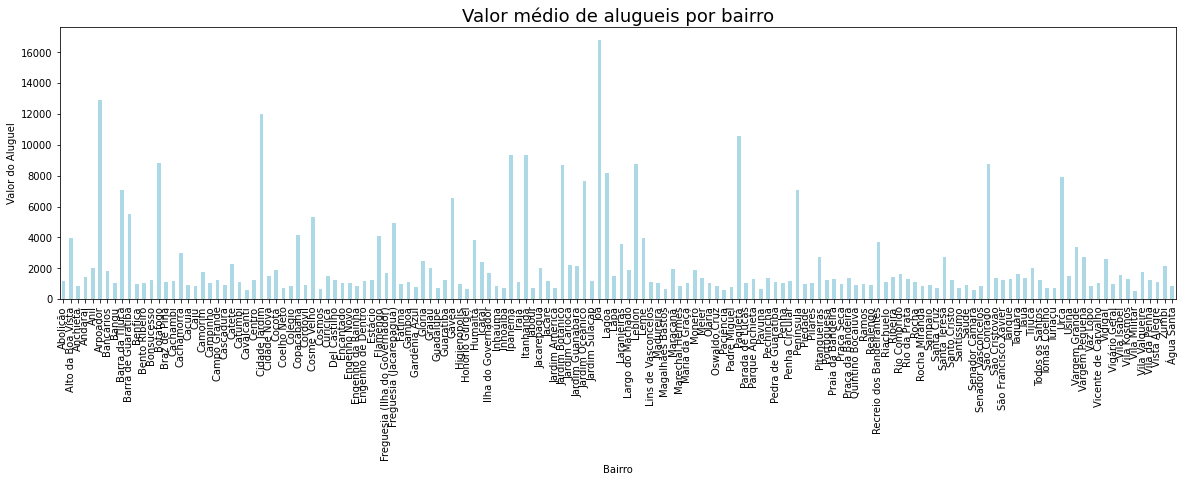

In [2]:
fig = bairros['Valor'].mean().plot.bar(color='lightblue')
fig.set_title('Valor médio de alugueis por bairro', {'fontsize':18})
fig.set_ylabel('Valor do Aluguel')

Text(0, 0.5, 'Valor do Aluguel')

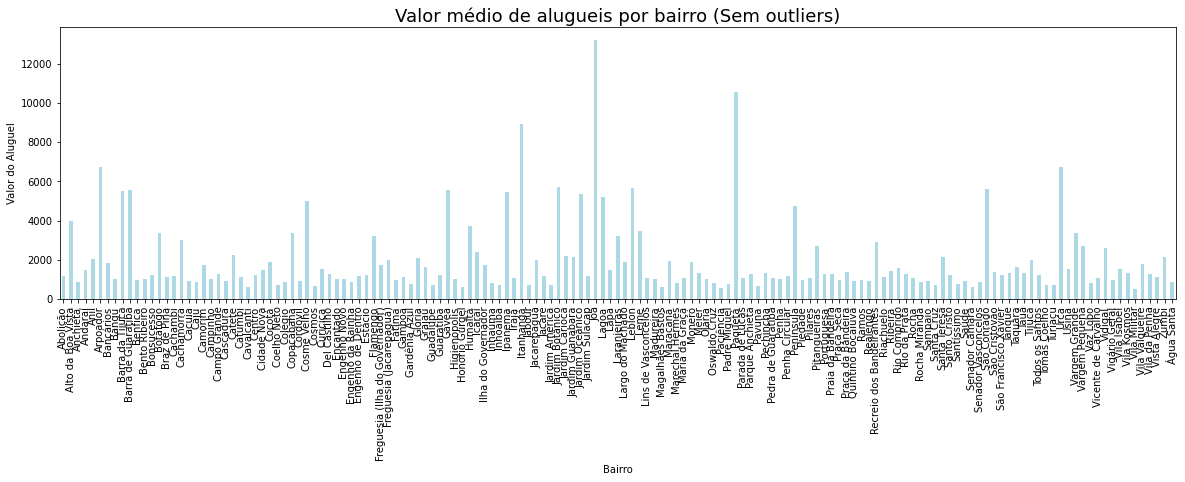

In [3]:
fig = bairros_sem_otl['Valor'].mean().plot.bar(color='lightblue')
fig.set_title('Valor médio de alugueis por bairro (Sem outliers)', {'fontsize':18})
fig.set_ylabel('Valor do Aluguel')

Text(0, 0.5, 'Valor do Aluguel')

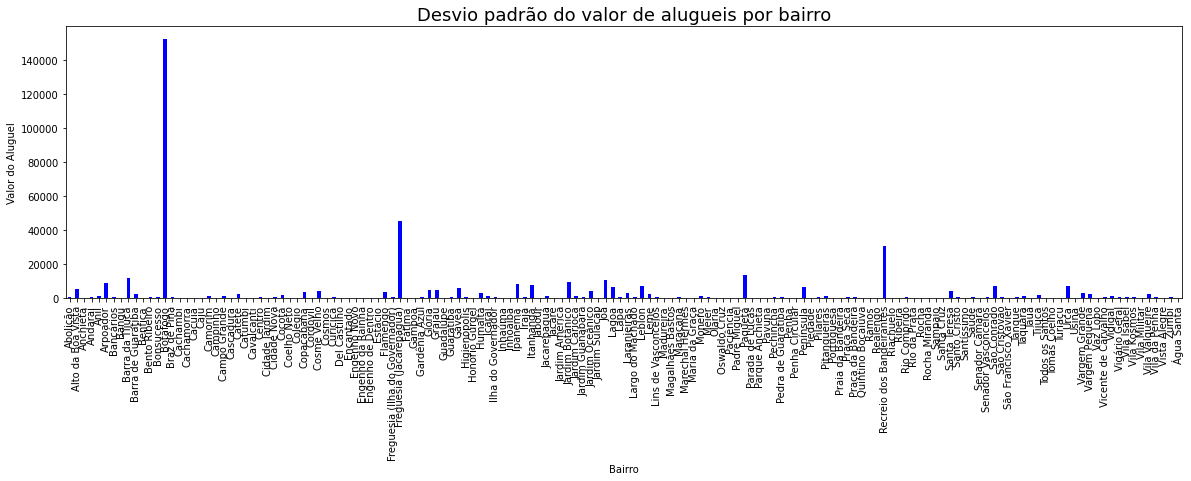

In [4]:
fig = bairros['Valor'].std().plot.bar(color='blue')
fig.set_title('Desvio padrão do valor de alugueis por bairro', {'fontsize':18})
fig.set_ylabel('Valor do Aluguel')

Text(0, 0.5, 'Valor do Aluguel')

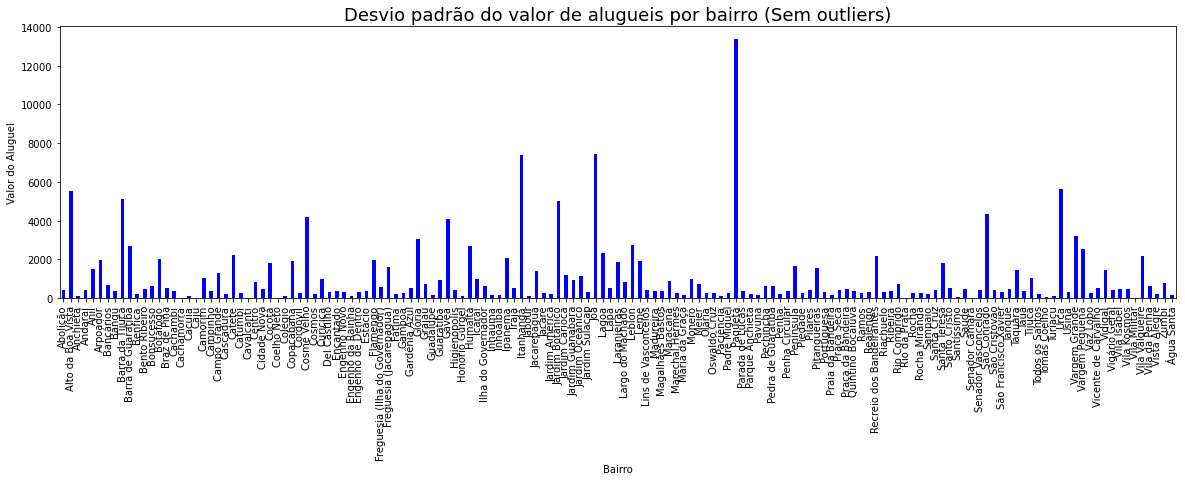

In [5]:
fig = bairros_sem_otl['Valor'].std().plot.bar(color='blue')
fig.set_title('Desvio padrão do valor de alugueis por bairro (Sem outliers)', {'fontsize':18})
fig.set_ylabel('Valor do Aluguel')

Text(0, 0.5, 'Valor do Aluguel (em milhões)')

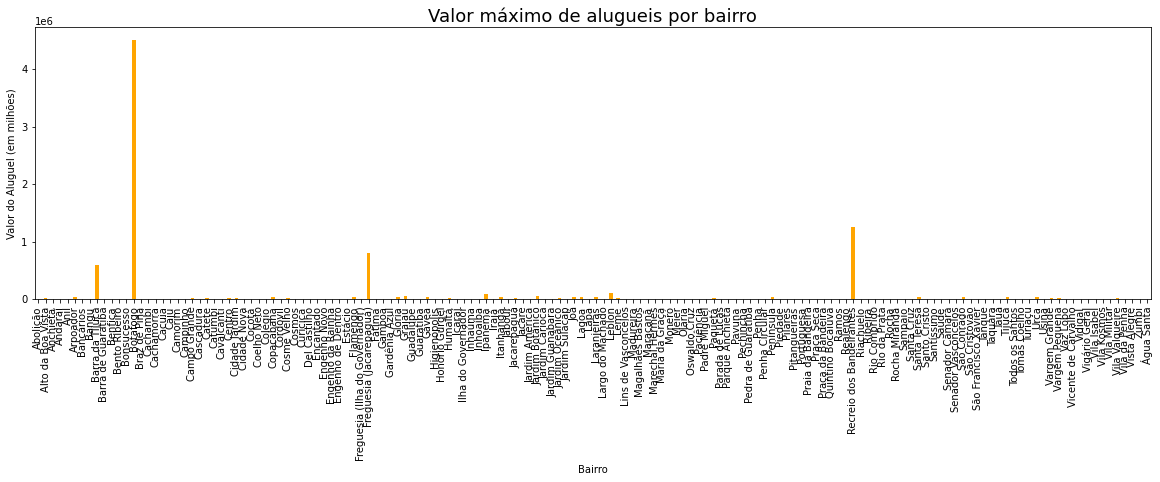

In [6]:
fig = bairros['Valor'].max().plot.bar(color='orange')
fig.set_title('Valor máximo de alugueis por bairro', {'fontsize':18})
fig.set_ylabel('Valor do Aluguel (em milhões)')

Text(0, 0.5, 'Valor do Aluguel (em milhões)')

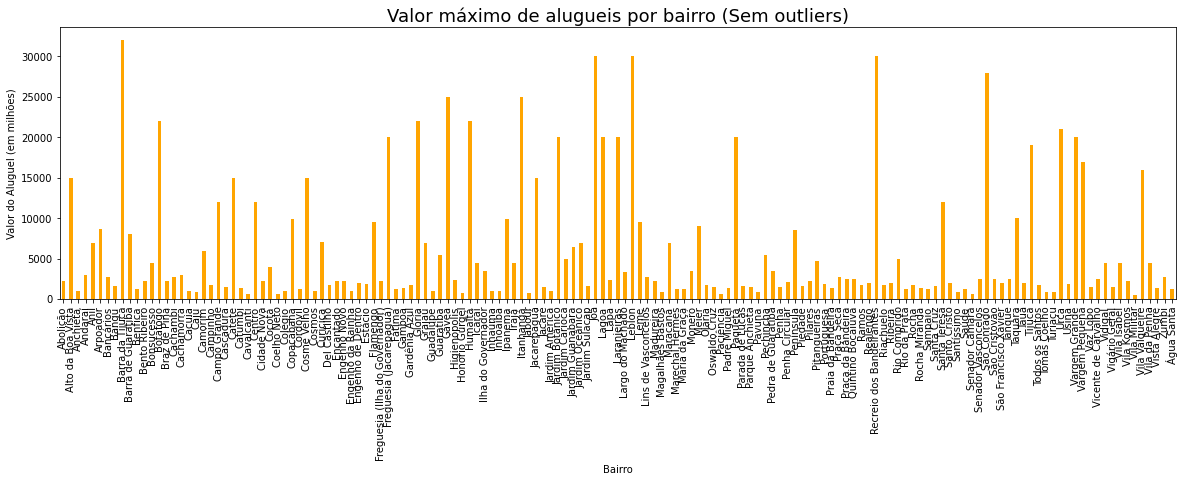

In [7]:
fig = bairros_sem_otl['Valor'].max().plot.bar(color='orange')
fig.set_title('Valor máximo de alugueis por bairro (Sem outliers)', {'fontsize':18})
fig.set_ylabel('Valor do Aluguel (em milhões)')

Text(0, 0.5, 'Valor do Aluguel (em milhões)')

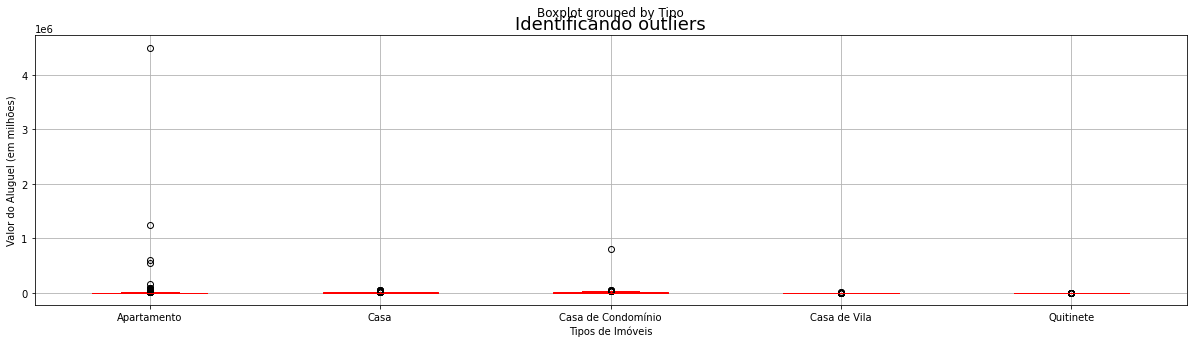

In [8]:
dados.boxplot(['Valor'], by=['Tipo'], color='red')
plt.title('Identificando outliers', {'fontsize':18})
plt.xlabel('Tipos de Imóveis')
plt.ylabel('Valor do Aluguel (em milhões)')

Text(0.5, 0, 'Tipos de Imóveis')

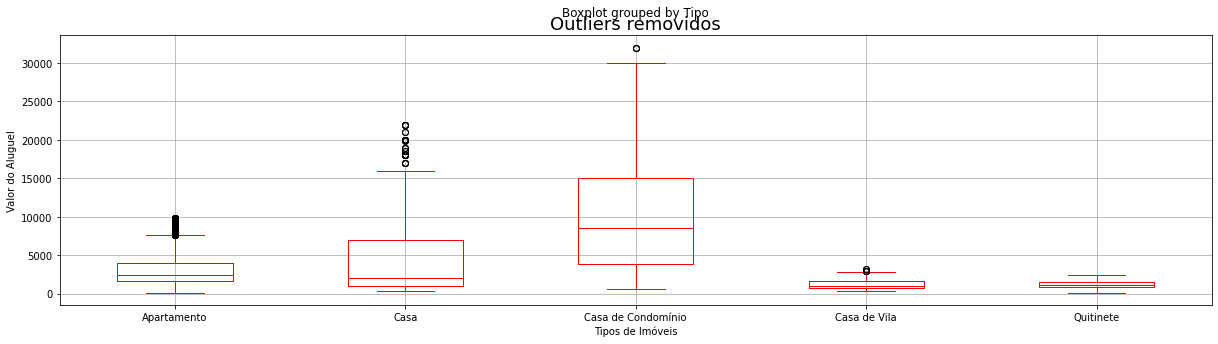

In [9]:
df_sem_otl.boxplot(['Valor'], by=['Tipo'], color='red')
plt.title('Outliers removidos', {'fontsize':18})
plt.ylabel('Valor do Aluguel')
plt.xlabel('Tipos de Imóveis')

Text(0, 0.5, 'Quantidade de Imóveis')

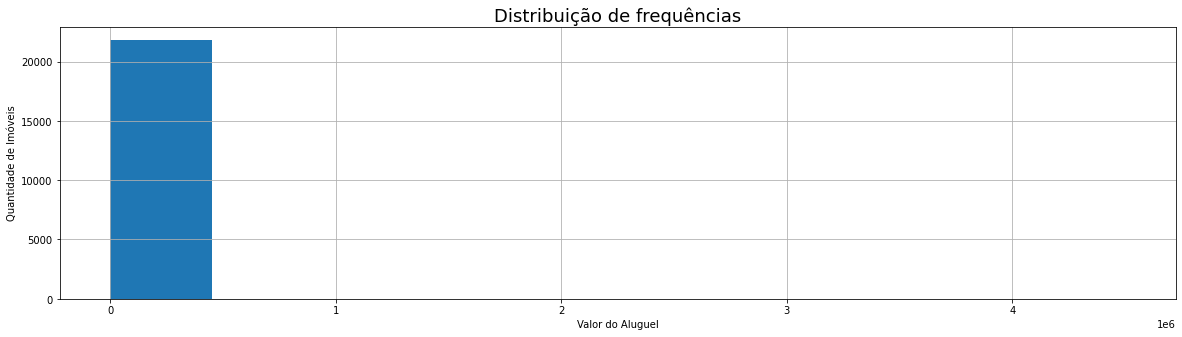

In [10]:
dados.hist(['Valor'])
plt.title('Distribuição de frequências', {'fontsize':18})
plt.xlabel('Valor do Aluguel')
plt.ylabel('Quantidade de Imóveis')

Text(0, 0.5, 'Quantidade de Imóveis')

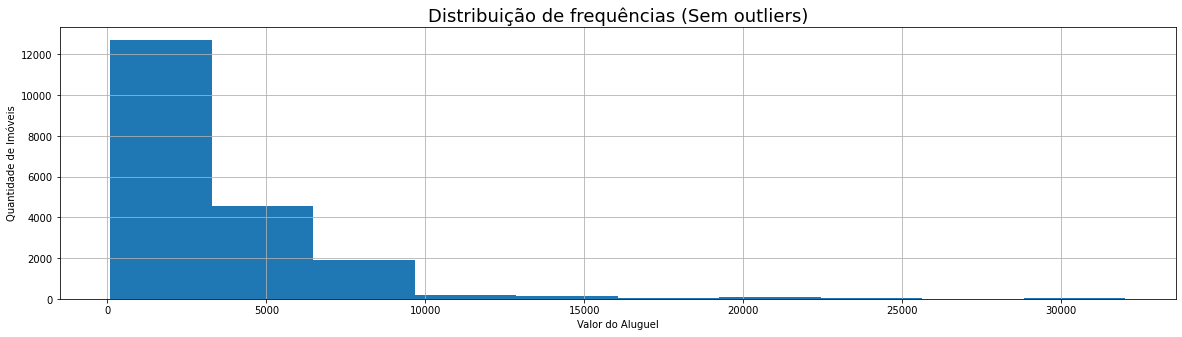

In [11]:
df_sem_otl.hist(['Valor'])
plt.title('Distribuição de frequências (Sem outliers)', {'fontsize':18})
plt.xlabel('Valor do Aluguel')
plt.ylabel('Quantidade de Imóveis')

Text(0.5, 1.0, 'Valor médio por Tipo')

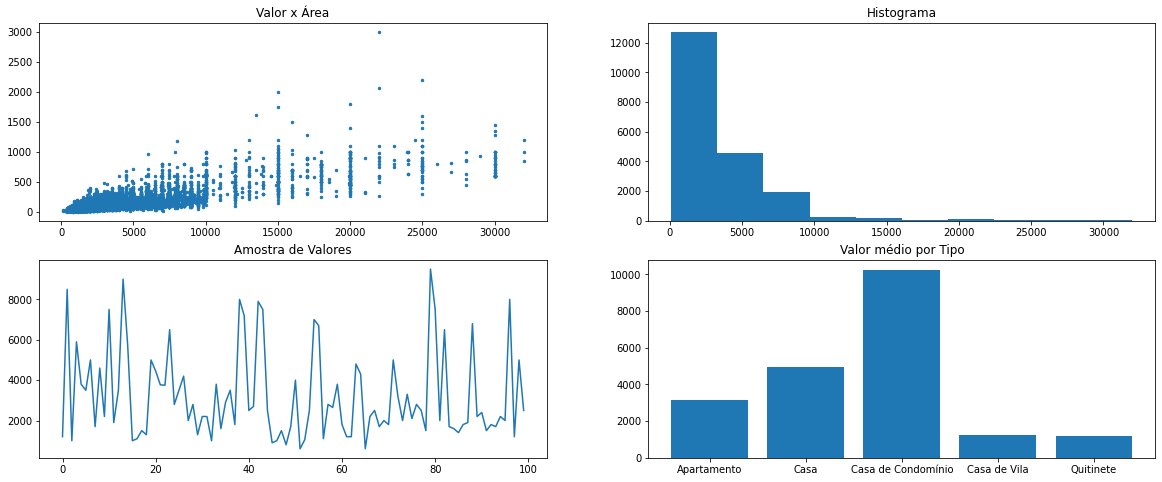

In [12]:
plt.rc('figure', figsize = (20, 8))
area = plt.figure()

g1 = area.add_subplot(2, 2, 1)  # 2 linhas, 2 colunas, posição 1
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

g1.scatter(df_sem_otl.Valor, df_sem_otl.Area, s=6)
g1.set_title('Valor x Área')

g2.hist(df_sem_otl.Valor)
g2.set_title('Histograma')

dados_g3 = df_sem_otl.Valor.sample(100)     # retorna 100 registros aleatóriamente
dados_g3.index = range(dados_g3.shape[0])   # redefine o index
g3.plot(dados_g3)
g3.set_title('Amostra de Valores')

grupo = df_sem_otl.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor médio por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

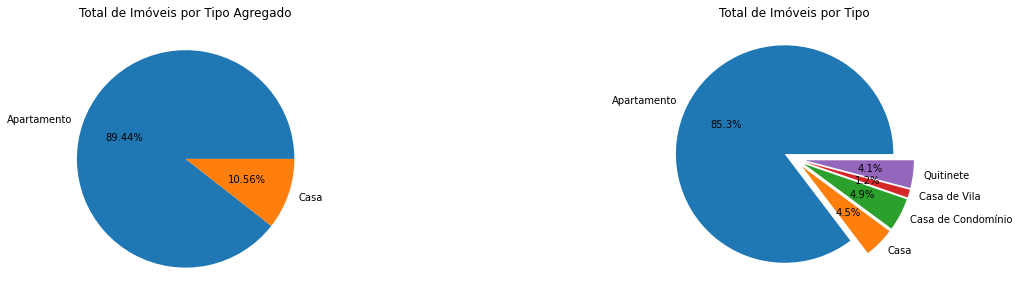

In [13]:
plt.rc('figure', figsize = (20, 5))
area = plt.figure(facecolor='white')

g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

grupo1 = df_sem_otl.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.2f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = df_sem_otl.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')